In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif, VarianceThreshold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder

In [142]:
df = pd.read_csv("Automobile_data.csv", sep=",")

In [143]:
missing_values = df.isnull().sum()
print("Відсутні значення:")
print(missing_values)

Відсутні значення:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [144]:
print(df.head(20))

    symboling normalized-losses         make fuel-type aspiration  \
0           3                 ?  alfa-romero       gas        std   
1           3                 ?  alfa-romero       gas        std   
2           1                 ?  alfa-romero       gas        std   
3           2               164         audi       gas        std   
4           2               164         audi       gas        std   
5           2                 ?         audi       gas        std   
6           1               158         audi       gas        std   
7           1                 ?         audi       gas        std   
8           1               158         audi       gas      turbo   
9           0                 ?         audi       gas      turbo   
10          2               192          bmw       gas        std   
11          0               192          bmw       gas        std   
12          0               188          bmw       gas        std   
13          0               188   

In [145]:
df.replace('?', pd.NA, inplace=True)
print(df.head(20))

    symboling normalized-losses         make fuel-type aspiration  \
0           3              <NA>  alfa-romero       gas        std   
1           3              <NA>  alfa-romero       gas        std   
2           1              <NA>  alfa-romero       gas        std   
3           2               164         audi       gas        std   
4           2               164         audi       gas        std   
5           2              <NA>         audi       gas        std   
6           1               158         audi       gas        std   
7           1              <NA>         audi       gas        std   
8           1               158         audi       gas      turbo   
9           0              <NA>         audi       gas      turbo   
10          2               192          bmw       gas        std   
11          0               192          bmw       gas        std   
12          0               188          bmw       gas        std   
13          0               188   

In [146]:
print(df.isnull().sum())
df = df.dropna()
print(df.head(20))

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64
    symboling normalized-losses       make fuel-type aspiration num-of-doors  \
3           2               164       audi       gas        std         four   
4           2               164       audi       gas        std         four   
6           1               158       audi       gas        std         four   
8           1               158       audi 

In [147]:
df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']] = df[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].astype(float)
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = df[numerical_columns].astype(float)
categorical_columns = df.select_dtypes(include=[object]).columns

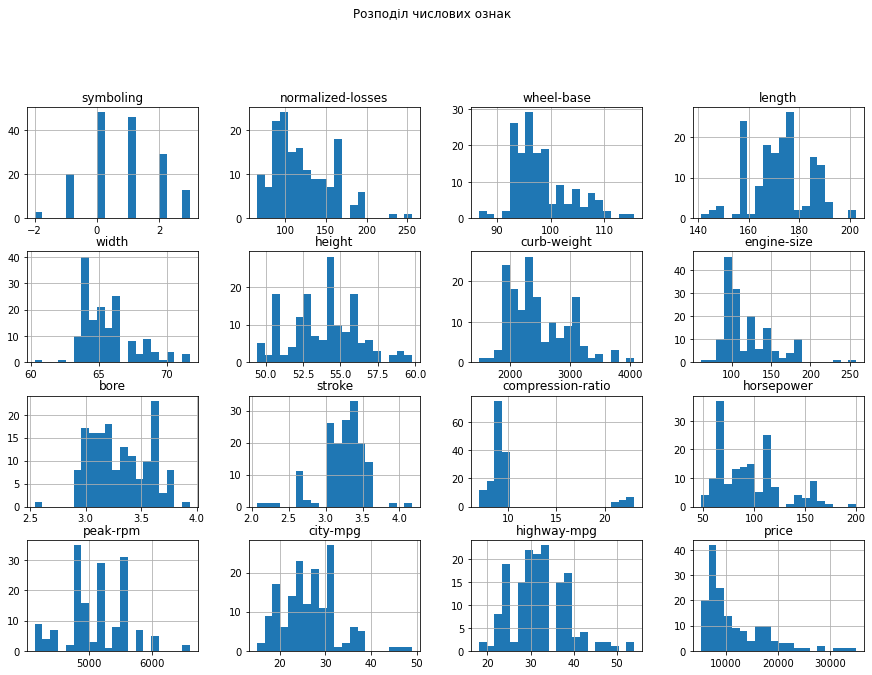

In [148]:
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Розподіл числових ознак", y=1.02)
plt.show()

З графіку можна побачити, що стовпчик symboling, wheel-base, length, width, height, curb-weight, engine-size, compression-ratio, city-mpg, highway-mpg підходять по значенням заданим в контексті задачі. Але не вистачає декілько числових стовпчиків, а саме normalized-losses, bore, stroke, horsepower, peak-rpm, price. Після форматування вище сказаних стовпчиків у формат числовий, то впевнелись що всі значення відповідають заданим діапазонам, тож видалення аномалій в числових даних не потребується

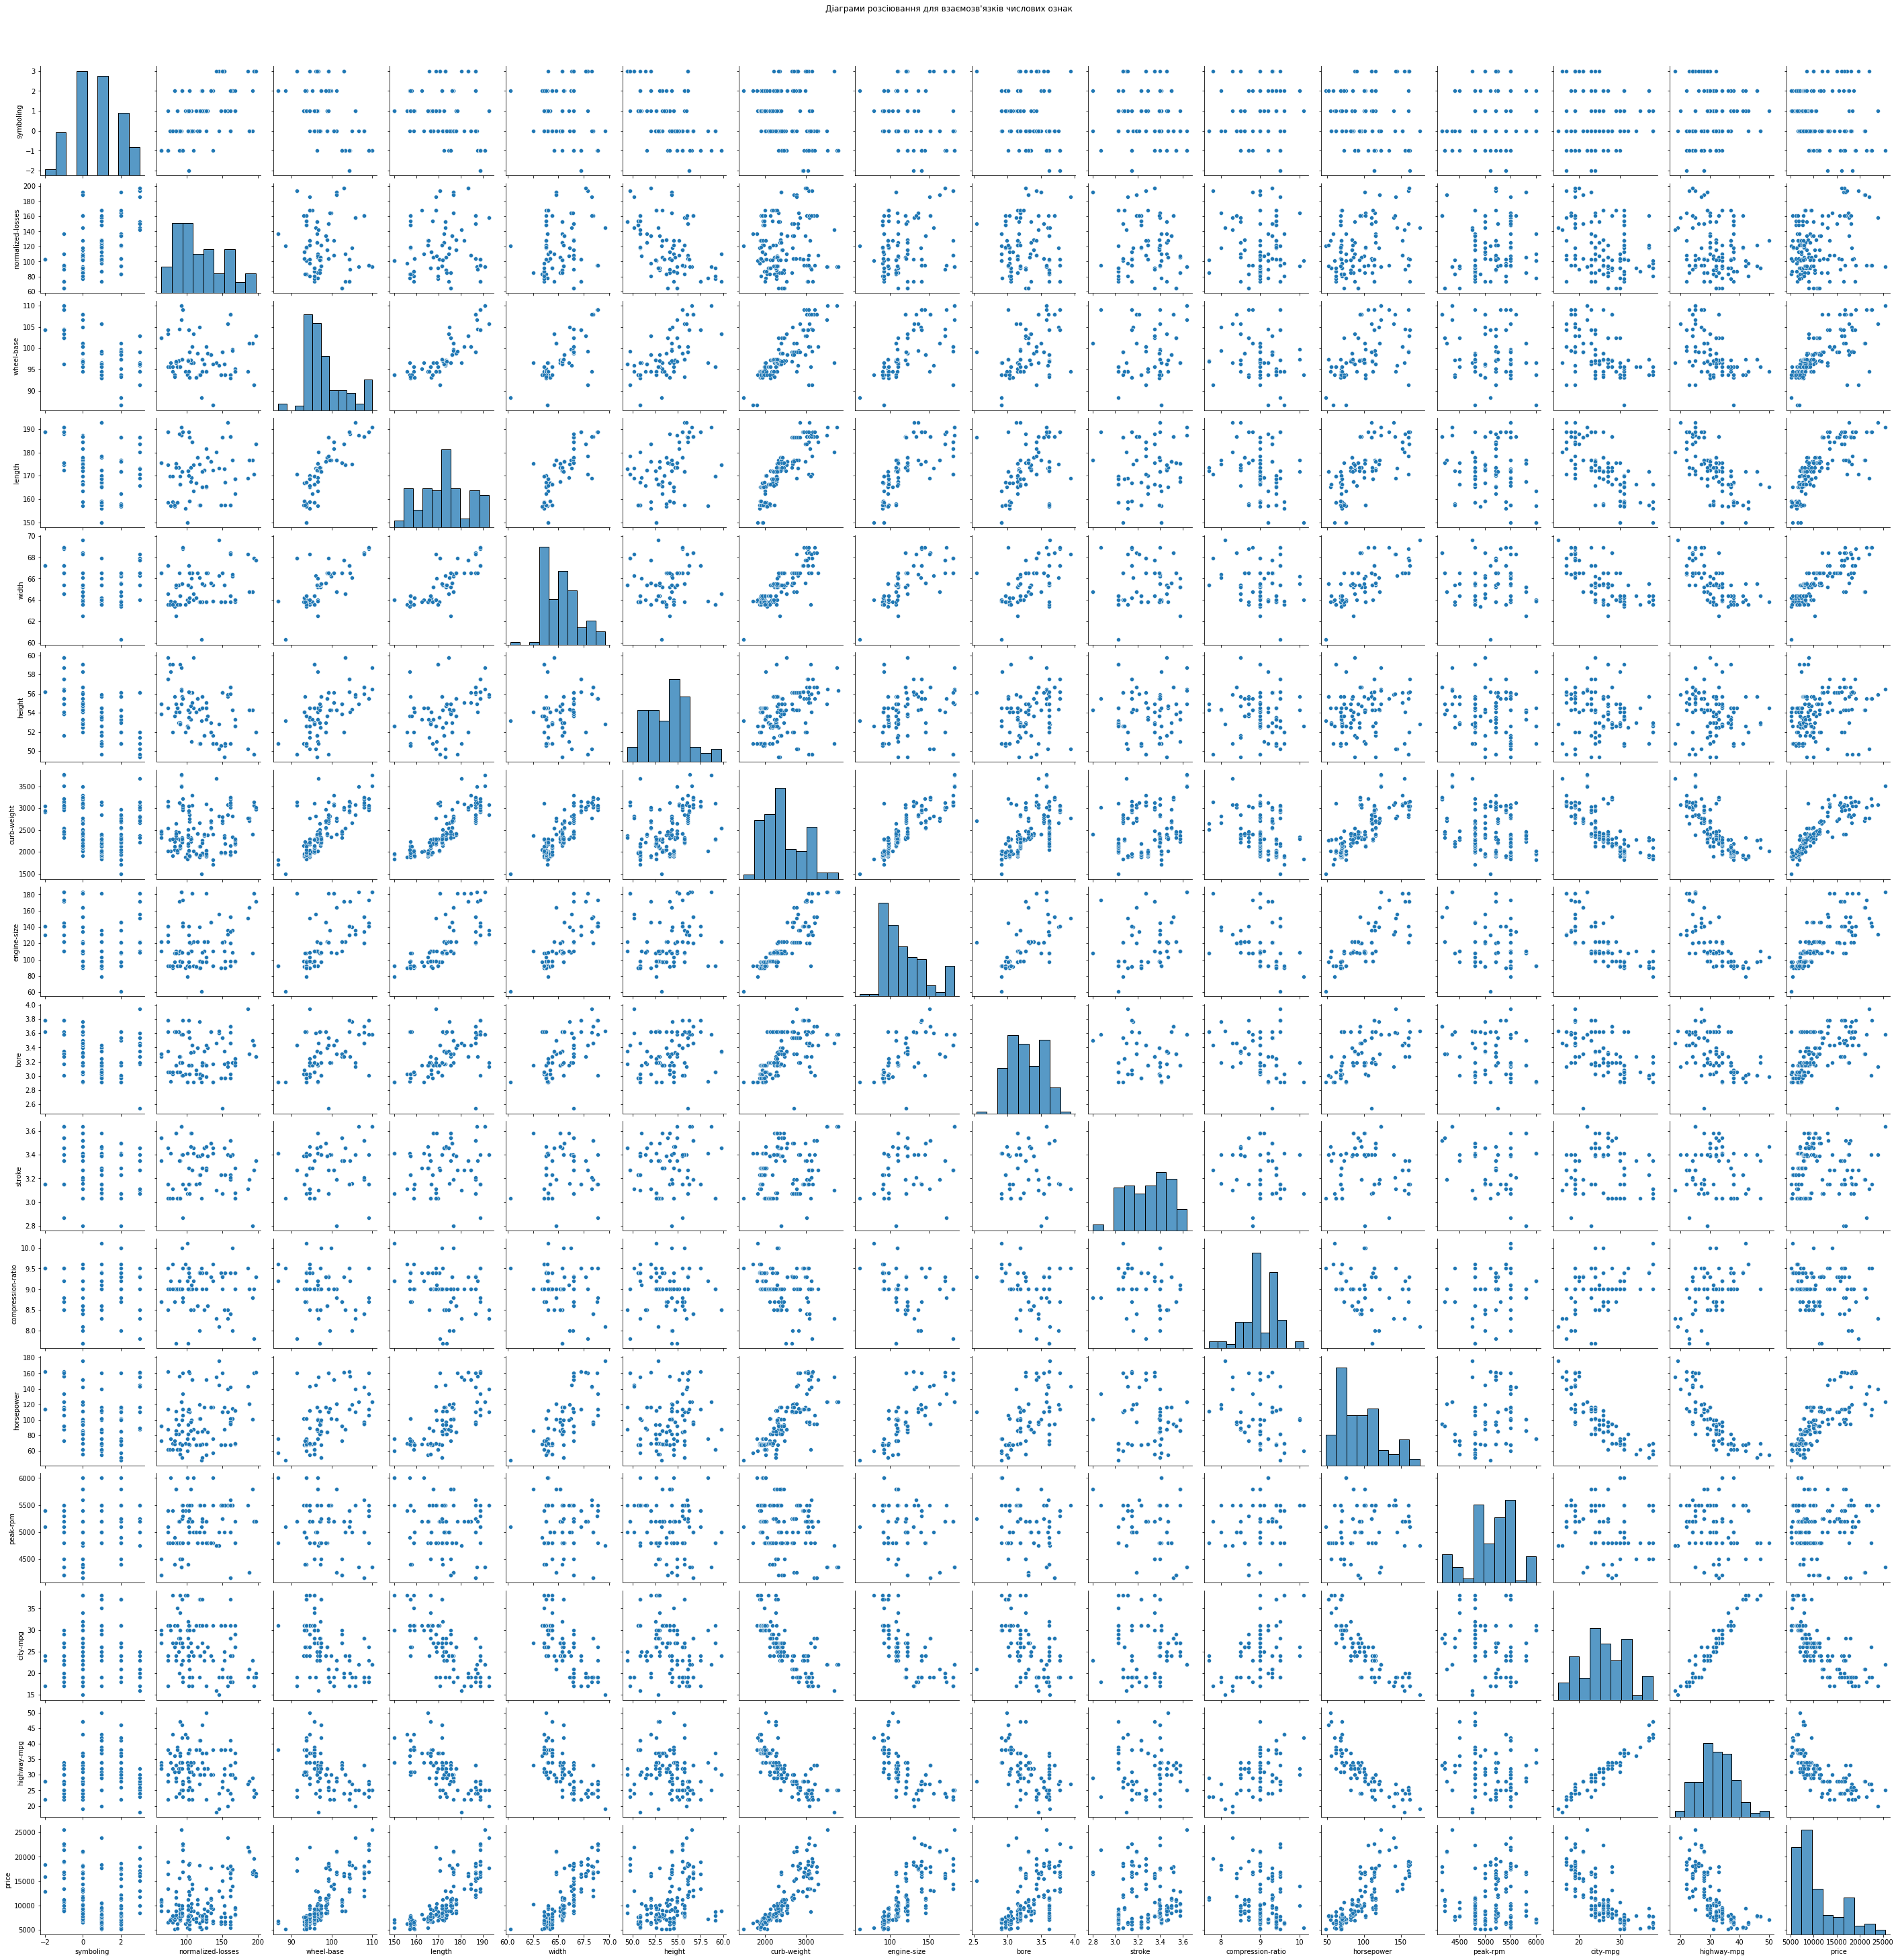

In [140]:
sns.pairplot(df[numerical_columns])
plt.suptitle("Діаграми розсіювання для взаємозв'язків числових ознак", y=1.02)
plt.savefig(f'Залежність_всіх_числових_даних.png')
plt.show()

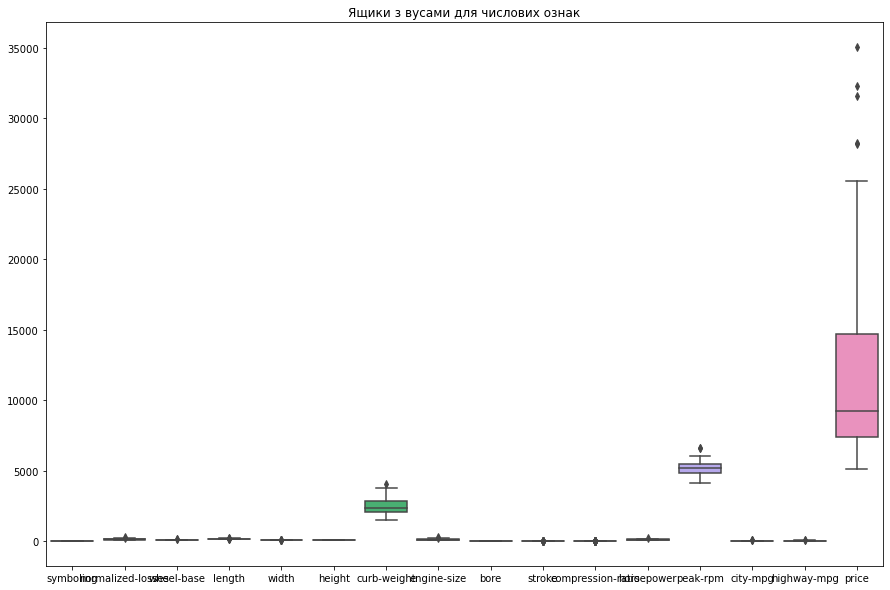

In [149]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns])
plt.title("Ящики з вусами для числових ознак")
plt.savefig("Графік яшику з вусами.png")
plt.show()

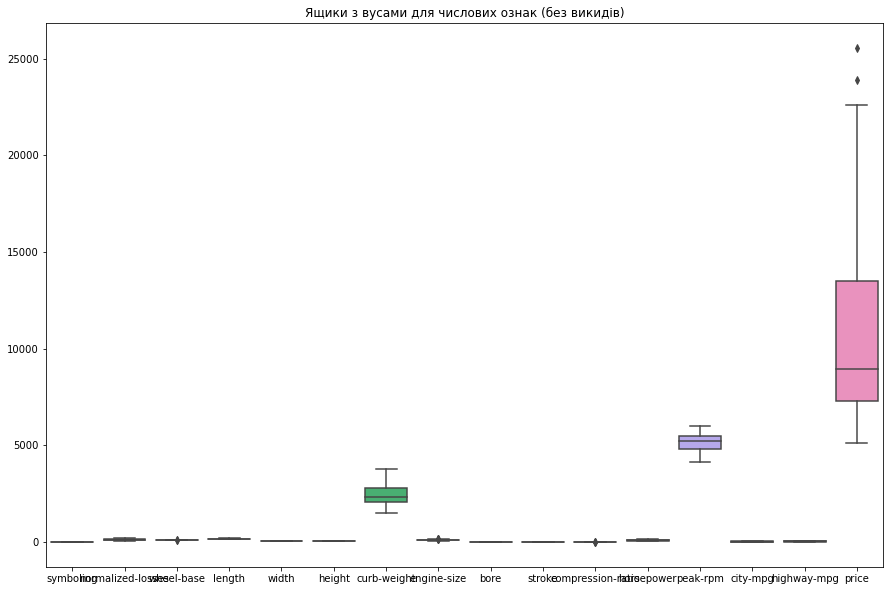

In [150]:
threshold = 1.5

# Функція для визначення викидів
def remove_outliers(column):
    q75, q25 = np.percentile(column, [75 ,25])
    iqr = q75 - q25
    lower_bound = q25 - (threshold * iqr)
    upper_bound = q75 + (threshold * iqr)
    return column[(column > lower_bound) & (column < upper_bound)]

# Видалення викидів для кожного числового стовпця
for column in numerical_columns:
    df[column] = remove_outliers(df[column])

# Повторний графік ящиків
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns])
plt.title("Ящики з вусами для числових ознак (без викидів)")
plt.savefig("Графік_яшику_з_вусами_відфільтровані.png")
plt.show()

Ми видалили викиди які були позначені на графіках, але не всі. Вважаю, що вони не спричинять аналізу даних, та бувають випадки, особливо в фінансах, як можна побачити по полю price, що данні чутливі до викидів. Також діапазон як зазначав вище підходить під умови які були задані в контексті, тож можемо продовжувати працювати з цими даними

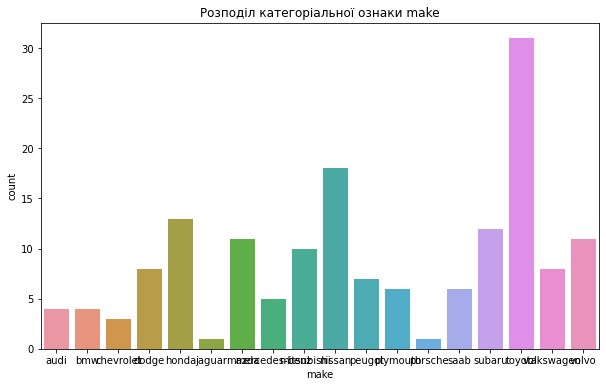

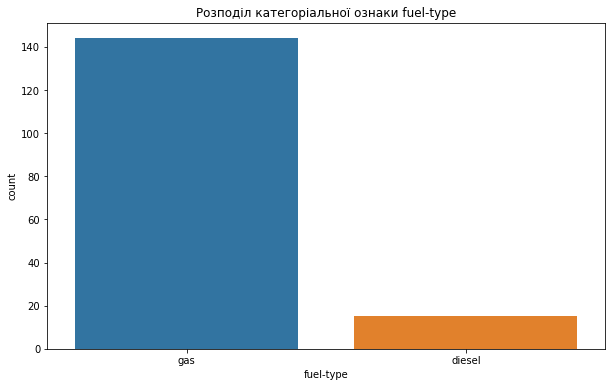

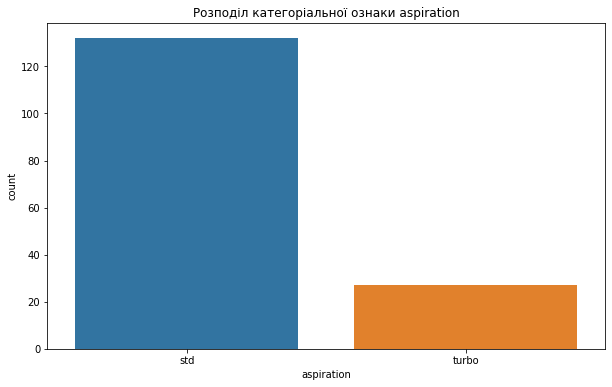

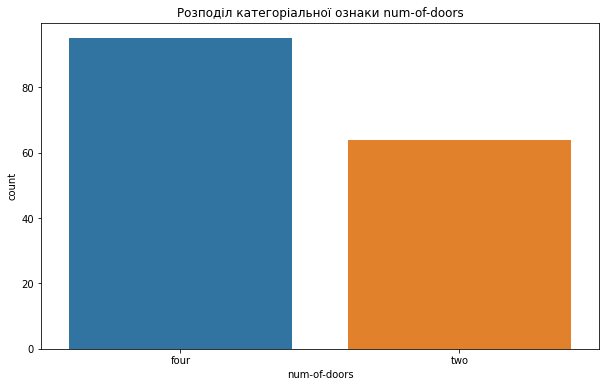

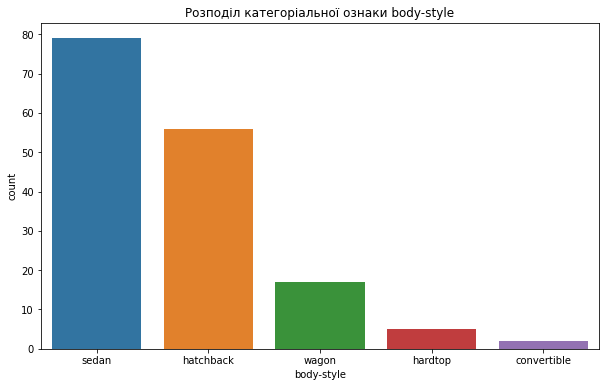

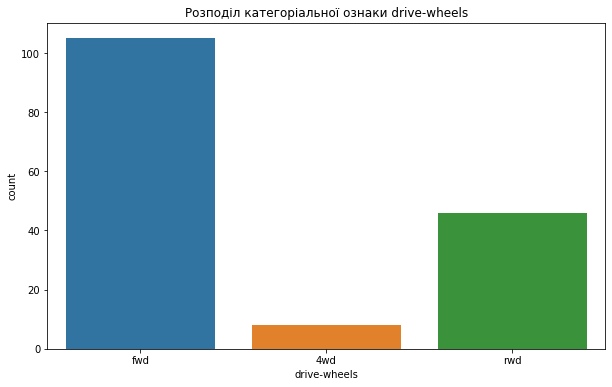

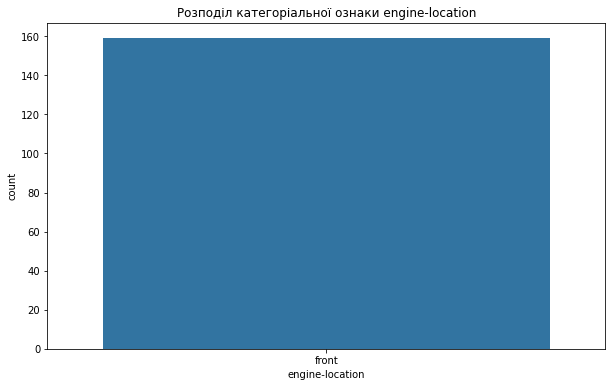

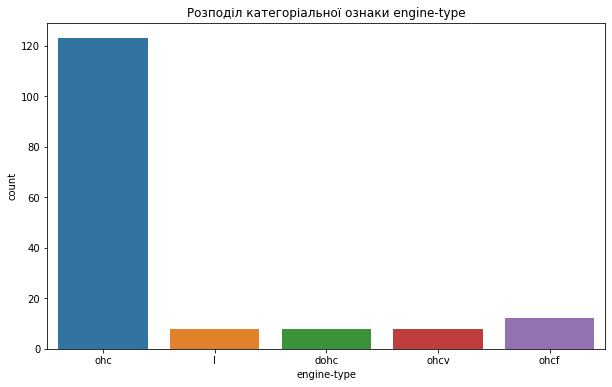

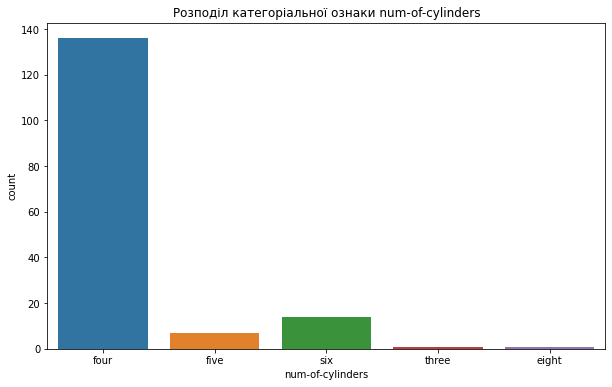

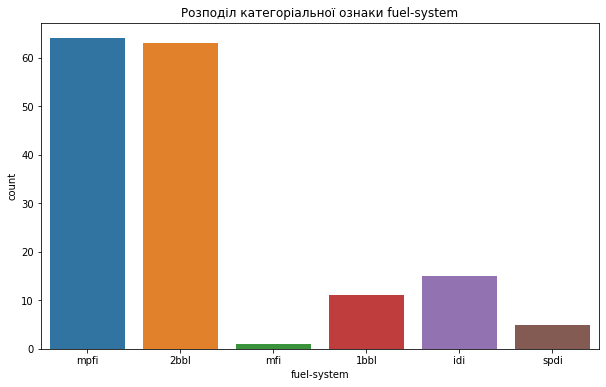

In [124]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f"Розподіл категоріальної ознаки {column}")
    plt.show()

Як бачимо всі поля присутні і в них є задані в контексті задачі значення, тож можемо йти далі

In [151]:
df.fillna(0)
X = df.drop('price', axis=1)  # replace 'target_variable' with your actual target variable
y = df['price']

In [152]:
X = X.fillna(0)
y = y.fillna(0)

# Використання LabelEncoder
le = LabelEncoder()
for column in X.select_dtypes(include='object').columns:
    X[column] = le.fit_transform(X[column])


# Використання VarianceThreshold
variance_selector = VarianceThreshold()
X_variance = variance_selector.fit_transform(X)

# Використання SelectKBest
f_score_selector = SelectKBest(score_func=f_regression, k='all')
X_f_score = f_score_selector.fit_transform(X, y)

# Assuming you have already calculated the rankings for f_score
f_score_selector.fit(X, y)
f_score_coef = f_score_selector.scores_
f_score_ranking_df = pd.DataFrame({'Feature': X.columns, 'F_Score_Coef': f_score_coef})

lasso_selector = Lasso(alpha=0.01)
lasso_selector.fit(X, y)
lasso_coef = np.abs(lasso_selector.coef_)
lasso_ranking_df = pd.DataFrame({'Feature': X.columns, 'Lasso_Coef': lasso_coef})

# Assuming you have already calculated the rankings for variance
variance_selector.fit(X)
variance_coef = variance_selector.variances_
variance_ranking_df = pd.DataFrame({'Feature': X.columns, 'Variance_Coef': variance_coef})

# Embedded Methods: Random Forest
rf_selector = RandomForestRegressor()
rf_selector.fit(X, y)
rf_importance = rf_selector.feature_importances_
rf_ranking_df = pd.DataFrame({'Feature': X.columns, 'RF_Importance': rf_importance})

# Merge all ranking dataframes
all_rankings_df = pd.merge(variance_ranking_df, f_score_ranking_df, on='Feature')
all_rankings_df = pd.merge(all_rankings_df, lasso_ranking_df, on='Feature')
all_rankings_df = pd.merge(all_rankings_df, rf_ranking_df, on='Feature')

# Calculate average rank for each feature
all_rankings_df['Average_Rank'] = all_rankings_df.mean(axis=1)

# Final ranking dataframe
final_ranking_df = all_rankings_df.sort_values(by='Average_Rank')

print(final_ranking_df)

              Feature  Variance_Coef  F_Score_Coef   Lasso_Coef  \
8     engine-location       0.000000           NaN     0.000000   
0           symboling       1.414501      2.194170    36.341932   
14        engine-type       0.527669      0.321205    81.210045   
6          body-style       0.578458      4.039308    83.755341   
24        highway-mpg      48.178790     32.159053    15.477626   
2                make      17.000000      2.029167   109.476320   
12             height       5.114905      9.007760   134.872312   
23           city-mpg      38.000000     34.646148    80.298792   
11              width      69.600000      1.952981    85.317353   
1   normalized-losses     197.000000      7.405395    13.108588   
10             length     192.700000     37.493261     9.788037   
21         horsepower     176.000000     60.232100    13.481973   
9          wheel-base     110.000000     42.139954   100.286291   
19             stroke       1.011627      0.767617   291.67426

C:\Users\Lokda18\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\Lokda18\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\Lokda18\AppData\Local\Temp\ipykernel_12304\743376218.py:45: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_rankings_df['Average_Rank'] = all_rankings_df.mean(axis=1)


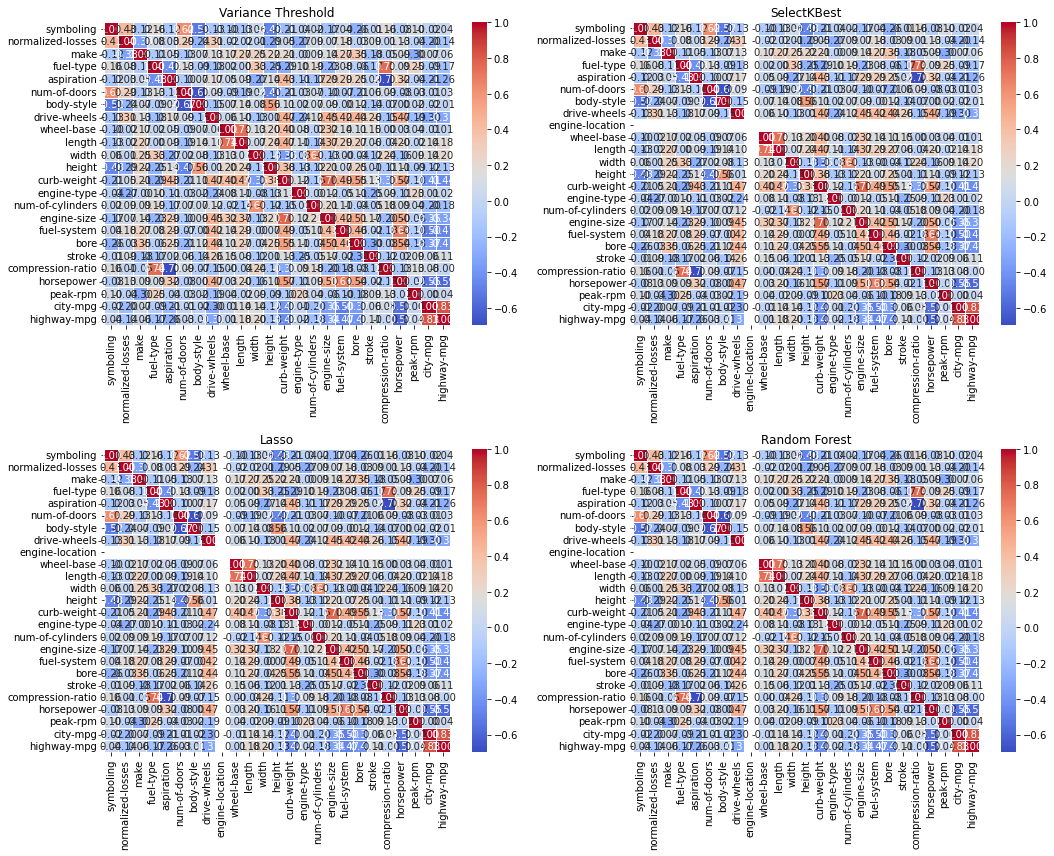

In [154]:
variance_selected_columns = X.columns[variance_selector.get_support()]
variance_corr = pd.DataFrame(X_variance, columns=variance_selected_columns).corr()

# Матриця кореляцій для SelectKBest
f_score_corr = pd.DataFrame(X_f_score, columns=X.columns).corr()

# Матриця кореляцій для Lasso
lasso_corr = X.corr()

# Матриця кореляцій для Random Forest
rf_corr = X.corr()

# Побудова heatmap для кожної матриці кореляцій
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.heatmap(variance_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Variance Threshold')

plt.subplot(2, 2, 2)
sns.heatmap(f_score_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('SelectKBest')

plt.subplot(2, 2, 3)
sns.heatmap(lasso_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Lasso')

plt.subplot(2, 2, 4)
sns.heatmap(rf_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Random Forest')

plt.tight_layout()
plt.savefig("Взаємозв'язки_між_полями.png")
plt.show()